<a href="https://colab.research.google.com/github/dapsavoie/agricultural_satellite_classifier/blob/master/Create_train_data_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data, Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os

import tensorflow as tf

import pandas as pd

Using TensorFlow backend.


In [0]:
 # display file 

In [0]:
#!tar -xvf '/content/drive/My Drive/Agriculture-Vision.tar (1).gz' -C '/content/drive/My Drive/agri_vision/'

In [0]:
#load csv, train, val

base_dir =  '/content/drive/My Drive/agri_vision/'
train_folder = os.path.join(base_dir+ 'Agriculture-Vision/train/images/rgb')

val_folder = os.path.join(base_dir +'Agriculture-Vision/val/rgb/')


test_folder = os.path.join(base_dir + '/Agriculture-Vision/test/test_rgb/')


train = pd.read_csv('/content/drive/My Drive/agri_vision/final_encoded.csv')

#strip train index
train['index'] = train['index'].str.rstrip('.png')

In [0]:
train.drop(columns='Unnamed: 0', inplace=True)

In [0]:
train_2k = train.loc[0:1999]

In [8]:
train_2k.shape

(2000, 7)

# Create Train and Val Images

In [0]:
# Load 2000 imag

In [0]:
train_image = []
for i in tqdm(range(2000)):
    img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/train/images/rgb/' + train['index'][i] + '.jpg', color_mode='rgb', target_size=None)
    img = image.img_to_array(img)
    train_image.append(img)

In [0]:
X = np.array(train_image)

In [0]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
data = X
# save to npy file
save('2000_xdata.npy', data)

In [0]:
#Create Validation Data Test 
val_index = list(os.listdir(val_folder))

In [0]:
val_image = []
for i in tqdm(range(300)):
    img = image.load_img(val_folder+val_index[i], color_mode='rgb', target_size=None)
    img = image.img_to_array(img)
    val_image.append(img)

In [0]:
val_array= np.array(val_image)

In [0]:
# define data
data = val_array
# save to npy file
save('300_val_data.npy', data)

#Create labels 

In [0]:
y = train[:2000]

In [0]:
y = np.array(train_2k.drop(['index'],axis=1))

In [21]:
y.shape 

(2000, 6)

In [0]:
# define data
data = y
# save to npy file
save('y_2000_data.npy', data)

# Train Test Split 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1800, 512, 512, 3), (200, 512, 512, 3), (1800, 6), (200, 6))

# Model Layers and Summary Report 
# Compile and Fit 

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(512,512,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 508, 508, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 254, 254, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 254, 254, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 250, 250, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 64)     

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/10
1800/1800 [==============================] - 201s 112ms/step - loss: 0.7481 - accuracy: 0.8394 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 2/10
1800/1800 [==============================] - 196s 109ms/step - loss: 0.7382 - accuracy: 0.8386 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 3/10
1800/1800 [==============================] - 196s 109ms/step - loss: 0.7150 - accuracy: 0.8395 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 4/10
1800/1800 [==============================] - 196s 109ms/step - loss: 0.6733 - accuracy: 0.8416 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 5/10
1800/1800 [==============================] - 196s 109ms/step - loss: 0.7070 - accuracy: 0.8387 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 6/10
1800/1800 [==============================] - 197s 109ms/step - loss: 0.7166 - accuracy: 0.8430 - val_loss: 1.4968 - val_accuracy: 0.9025
Epoch 7/10
1800/1800 [==============================] - 197s 109m

In [0]:
model.save('85%_loss_65%_binary_sequential.h5')

In [0]:
from keras.models import load_model
test_model = tf.keras.models.load_model('85%_loss_65%_binary_sequential.h5')

In [149]:
ls 85%_loss_65%_binary_sequential.h5

85%_loss_65%_binary_sequential.h5


In [150]:
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 508, 508, 16)      1216      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 254, 254, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 254, 254, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 250, 250, 32)      12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 121, 121, 64)     

# Load Image and Predict Probability it belongs to a class 

In [0]:
# Load Image and Predict Probability it belongs to a class 

In [0]:
img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/train/images/rgb/1W6YEHJJU_10032-6287-10544-6799.jpg', target_size=None)
img = image.img_to_array(img)
img = img/255

In [119]:
img.shape

(512, 512, 3)

In [120]:
classes = np.array(train.columns[1:])
classes

array(['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water',
       'waterway', 'weed_cluster'], dtype=object)

In [121]:
proba = model.predict(img.reshape(1, 512, 512, 3))
proba

array([[6.5071037e-04, 1.0740142e-02, 1.7803586e-03, 5.0106314e-03,
        2.4591589e-01, 7.3590225e-01]], dtype=float32)

In [122]:
top_3 = np.argsort(proba[0])[:-4:-1]
top_3

array([5, 4, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


weed_cluster (0.736)
waterway (0.246)
double_planter (0.0107)


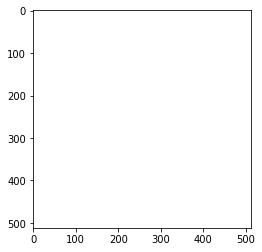

In [151]:
import matplotlib.pyplot as plt

for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [69]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1, 512, 512, 3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

IndexError: ignored

# Test Data

In [0]:
test_index = pd.DataFrame(os.listdir(test_folder))
test_index['index'] = test_index[0]

test_index.drop(columns = 0, inplace=True)
test_index = test_index.loc[0:199]

In [110]:
test_index

,index
0,C7CPXCQFB_818-792-1330-1304.jpg
1,AA6FKGHN2_2468-10654-2980-11166.jpg
2,TCGYUIB7I_2653-8327-3165-8839.jpg
3,D1M7QKGIN_3999-2721-4511-3233.jpg
4,AA6FKGHN2_1640-5812-2152-6324.jpg
...,...
195,MTTWHAFPN_2659-577-3171-1089.jpg
196,4AZJLIGYZ_7731-3019-8243-3531.jpg
197,2K21T1ZGV_2442-1934-2954-2446.jpg
198,Y6UDNUNDT_3652-2850-4164-3362.jpg


In [125]:
 
test_image = []
for i in tqdm(range(199)):
    img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/' + test_index['index'][i], color_mode='rgb', target_size=None)
    img = image.img_to_array(img)
    test_image.append(img)
img = image.img_to_array(test_image)


100%|██████████| 199/199 [00:01<00:00, 117.36it/s]


ValueError: ignored

In [0]:
 test_index = pd.DataFrame(os.listdir(test_folder))


In [0]:
img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/' + test_index['index'][i], color_mode='rgb', target_size=None)

In [0]:
for i in tqdm(range(199)):
    img = image.load_img('/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/' + test_index['index'][i], color_mode='rgb', target_size=None)

In [0]:
img = image.img_to_array(img)

In [0]:
test_image.append(img)

In [0]:
test_x = np.array(test_image)

In [0]:
model.predict(test_x)

# save model

In [0]:
import os

import tensorflow as tf
from tensorflow import keras

In [139]:
model = create_model()

NameError: ignored